In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

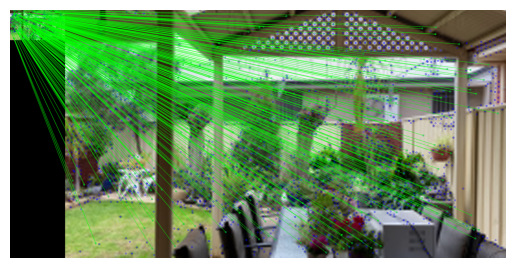

In [13]:
img2 = cv.imread('hr.jpg', cv.IMREAD_UNCHANGED)  # queryImage
img1 = cv.imread('lr.jpg', cv.IMREAD_UNCHANGED) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.axis("off")
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB),)
# plt.show()


plt.savefig("./fig.jpg")

In [4]:
import cv2 as cv 
import random

img = cv.imread("./1000.png")

for i in range(len(img)):
    for j in range(len(img[0])):
        if random.random() > 0.05:
            img[i][j] = [0,0,0]

cv.imwrite("./preInt.png", img)


True